In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

def smi2fp(smiles, radius=3, n_bits=2048):
    """使用MorganGenerator将SMILES转换为指纹"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    generator = GetMorganGenerator(radius=radius, fpSize=n_bits, countSimulation=True)
    fp = generator.GetCountFingerprintAsNumPy(mol)
    return fp

In [3]:
training_smis = pd.read_csv('training_smis.csv')
test_smis = pd.read_csv('test_smis.csv')
other_smis = pd.read_csv('other_smis.csv')
space_smis = pd.read_csv('space_smis.csv')

In [4]:
fps = []
smi_lrns = []

for _, row in space_smis.iterrows():
    fp_ligand = smi2fp(row["ligand"])
    fp_radical = smi2fp(row["radical"])
    fp_nucleophile = smi2fp(row["nucleophile"])
    fp = fp_ligand + fp_radical + fp_nucleophile
    if fp is not None:
        fps.append(fp)
        smi_lrns.append([row["ligand"], row["radical"], row["nucleophile"]])

fps = np.array(fps)

In [5]:
smi_lrns_df = pd.DataFrame(smi_lrns, columns=["ligand", "radical", "nucleophile"])
fps_df = pd.DataFrame(fps, columns=[f"fp{i}" for i in range(fps.shape[1])])

In [6]:
smi_lrns_df

,ligand,radical,nucleophile
0,c1ccc(cc1)P(c1ccccc1c1ccccc1P(c1ccccc1)c1ccccc...,C[C]C1=CC=CC=C1,C1=[C-]C=CC=C1
1,c1ccc(cc1)P(c1ccccc1c1ccccc1P(c1ccccc1)c1ccccc...,C[C]C1=CC=CC=C1,[CH-]=Cc1ccccc1
2,c1ccc(cc1)P(c1ccccc1c1ccccc1P(c1ccccc1)c1ccccc...,C[C]C1=CC=CC=C1,[O-][N+](=O)C1=CC=[C-]C=C1
3,c1ccc(cc1)P(c1ccccc1c1ccccc1P(c1ccccc1)c1ccccc...,C[C]C1=CC=CC=C1,[CH-]=Cc1ccc(cc1)[N+](=O)[O-]
4,c1ccc(cc1)P(c1ccccc1c1ccccc1P(c1ccccc1)c1ccccc...,C[C]C1=CC=CC=C1,CN(C1=CC=[C-]C=C1)C
...,...,...,...
132295,CN(CC[N-]C(=O)c1ccccn1)C,O=C1[C](F)CC2=CC=CC=C21,[C-]c1ccc(cc1)Cl
132296,CN(CC[N-]C(=O)c1ccccn1)C,O=C1[C](F)CC2=CC=CC=C21,[C-]c1ccc(cc1)F
132297,CN(CC[N-]C(=O)c1ccccn1)C,O=C1[C](F)CC2=CC=CC=C21,[C-]c1ccc(cc1)Br
132298,CN(CC[N-]C(=O)c1ccccn1)C,O=C1[C](F)CC2=CC=CC=C21,[C-]c1ccc(cc1)[N+](=O)[O-]


In [7]:
smi_lrns_fps_df = pd.concat([smi_lrns_df, fps_df], axis=1)

In [8]:
training_smi_lrns = training_smis.values.tolist()
test_smi_lrns = test_smis.values.tolist()

In [9]:
def get_type(s):
    if s in training_smi_lrns:
        return "Training Set"
    elif s in test_smi_lrns:
        return "Test Set"
    else:
        return "Other"

In [10]:
smi_lrns_fps_type_df = smi_lrns_fps_df.copy(deep=True)
types = []
for lrn in zip(smi_lrns_fps_type_df["ligand"], smi_lrns_fps_type_df["radical"], smi_lrns_fps_type_df["nucleophile"]):
    type = get_type(list(lrn))
    types.append(type)
smi_lrns_fps_type_df.insert(0, 'Type', types)

In [11]:
smi_lrns_fps_type_df["Type"].value_counts()

Type
Other           131983
Training Set       250
Test Set            67
Name: count, dtype: int64

In [12]:
smi_lrns_fps_type_df.loc[smi_lrns_fps_type_df["Type"] == "Other", [f"fp{i}" for i in range(fps.shape[1])]]

,fp0,fp1,fp2,fp3,fp4,fp5,fp6,fp7,fp8,fp9,...,fp2038,fp2039,fp2040,fp2041,fp2042,fp2043,fp2044,fp2045,fp2046,fp2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132295,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
132296,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
132297,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
132298,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap

def random_subspace(data:pd.DataFrame, rs:int, s=6000):
    rng = np.random.RandomState(rs)

    other_df = data[data["Type"] == "Other"]
    test_df = data[data["Type"] == "Test Set"]
    training_df = data[data["Type"] == "Training Set"]
    
    arr = rng.choice(a=np.arange(len(other_df)), replace=False, size=s)
    other_sub_df = other_df.iloc[arr].copy()

    subspace_data = pd.concat([
        other_sub_df, 
        test_df, 
        training_df
    ], axis=0, ignore_index=True)  # 保持原始索引

    fp_cols = data.columns[5:]

    other_sub_fps = other_sub_df[fp_cols].values
    test_fps = test_df[fp_cols].values
    training_fps = training_df[fp_cols].values

    subspace_fps = np.concatenate([other_sub_fps, test_fps, training_fps])

    return subspace_fps, subspace_data

def umap_reduction(rs:int):
    sub_fps, sub_data = random_subspace(smi_lrns_fps_type_df, rs, s=6000)
    reducer = umap.UMAP(
        n_components=2, n_jobs=1, n_neighbors=2, min_dist=0.3, random_state=rs, init="random"
    )
    umap_results = reducer.fit_transform(sub_fps)

    df_umap = pd.DataFrame(umap_results, columns=["UMAP 1", "UMAP 2"])
    df_result = pd.concat([df_umap, sub_data], axis=1)
    df_result.to_csv(f"umap_results_{rs}.csv", index=False)

    return df_result

/home/xgx/miniconda3/envs/DailyUse/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
smi_lrns_fps_type_df["Type"].value_counts()

Type
Other           131983
Training Set       250
Test Set            67
Name: count, dtype: int64

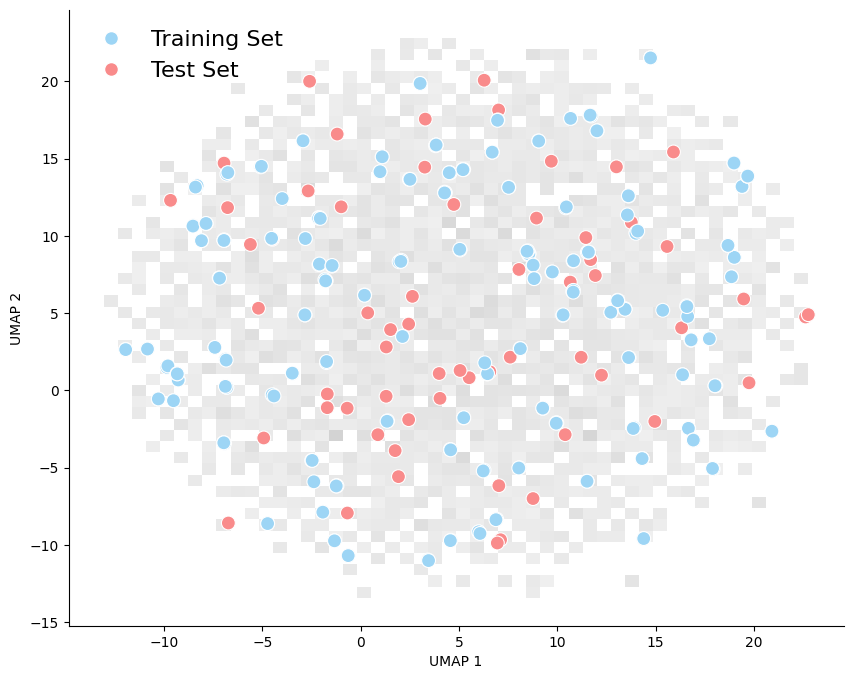

In [15]:
result_df = umap_reduction(2020)
result_df["Type"] = result_df["Type"].replace(
    {"Test": "Test Set"}
)

# 创建颜色映射
palette = {"Training Set": "#9DD5F5", "Test Set": "#F98B8B"}

fig, ax = plt.subplots(figsize=(10, 8))

sns.histplot(
    data=result_df.loc[result_df["Type"] == "Other", :],
    x="UMAP 1",
    y="UMAP 2",
    color="#A4A4A4",
    bins=50,
    alpha=0.25,
    ax=ax,
)

sns.scatterplot(
    data=result_df.loc[result_df["Type"] != "Other", :],
    x="UMAP 1",
    y="UMAP 2",
    hue="Type",
    palette=palette,
    s=100,
    alpha=1,
    ax=ax,
)

# ax.legend(frameon=False, title="", loc="upper left", fontsize=16)

from matplotlib.lines import Line2D
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['Training Set'], markersize=10, label='Reactions for Constructing LFER'),
#     Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['Test Set'], markersize=10, label='Reactions for Testing LFER')
# ]

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['Training Set'], markersize=10, label='Training Set'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette['Test Set'], markersize=10, label='Test Set')
]

ax.legend(handles=legend_elements, frameon=False, title="", loc="upper left", fontsize=16)

# ax.set_title(f"Chemical Space Visualization by Fingerprints", fontsize=14)
sns.despine()

fig.savefig(f"UMAP_by_Fingerprints.png", dpi=500, bbox_inches="tight")

In [16]:
def draw_pictures(ax, rs: int, no: str):
    palette = {"Other": "#A4A4A4", "Training Set": "#9DD5F5", "Test Set": "#F98B8B"}

    result_df = umap_reduction(rs)
    sns.histplot(
        data=result_df.loc[result_df["Type"] == "Other", :],
        x="UMAP 1",
        y="UMAP 2",
        color="#A4A4A4",
        bins=50,
        alpha=0.25,
        ax=ax,
    )

    sns.scatterplot(
        data=result_df.loc[result_df["Type"] != "Other", :],
        x="UMAP 1",
        y="UMAP 2",
        hue="Type",
        palette=palette,
        s=75,
        alpha=1,  # 减小点大小
        ax=ax,
    )

    ax.set_title(f"Trial {rs//2020}", fontsize=16)
    ax.set_xlabel("")
    ax.set_ylabel("")

    # 移除图例（将在主图添加）
    if no > 0:
        ax.get_legend().remove()

    return ax

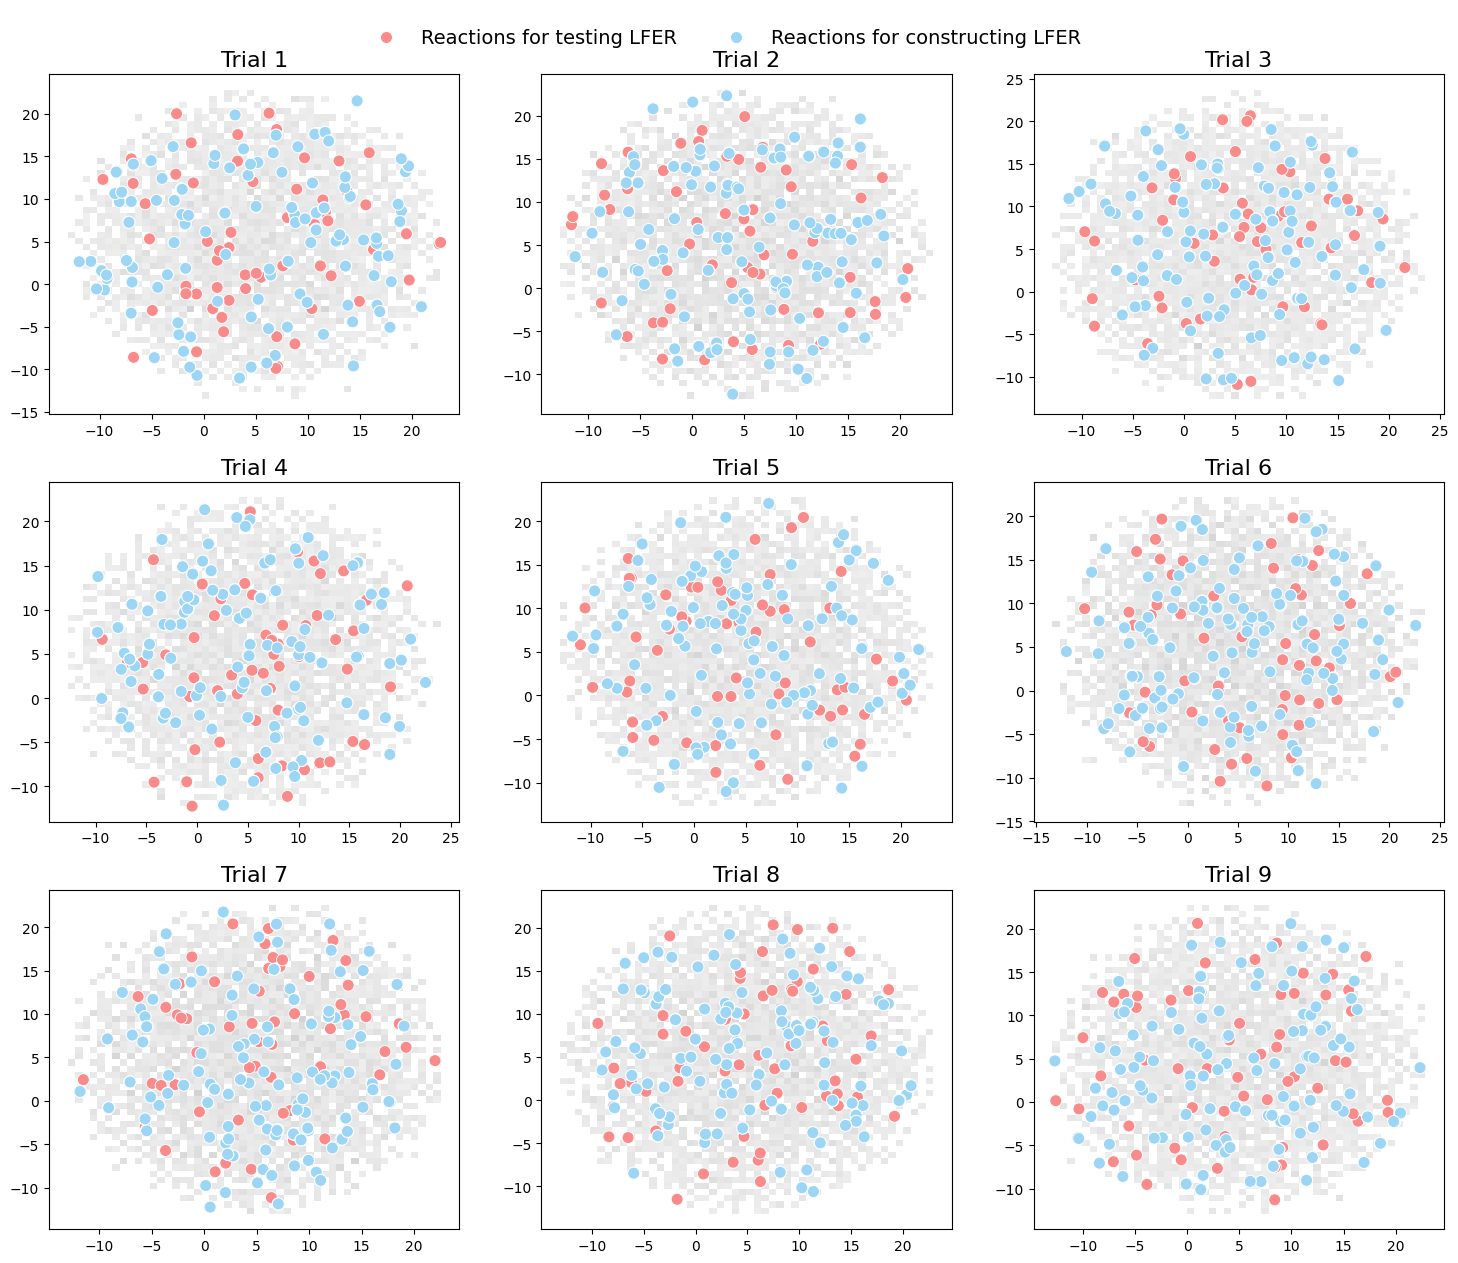

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
# fig.suptitle(
#     "UMAP Visualizations of the Chemical Space (9 Random Samples)", fontsize=16, y=0.98
# )

axes_flat = axes.flatten()

random_states = [2020 * (i + 1) for i in range(9)]
for i, (ax, state) in enumerate(zip(axes_flat, random_states)):
    draw_pictures(ax, rs=state, no=i)
    if ax.get_legend() is not None:
        ax.get_legend().remove()

handles, labels = axes_flat[0].get_legend_handles_labels()
labels = ["Reactions for testing LFER", "Reactions for constructing LFER"]
legend = fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=3,
    fontsize=14,
    bbox_to_anchor=(0.5, 0.93),
    frameon=False,
    fancybox=False,
    shadow=False,
    borderpad=1,
)

# plt.tight_layout()

plt.savefig("UMAP_9_subplots_fps.png", dpi=500, bbox_inches="tight")
plt.show()